## Load Modules

In [1]:
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
# %matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
from ipdb import set_trace as mybreak
import pyicon as pyic
import cartopy.crs as ccrs
import glob
import pickle
import maps_icon_smt_temp as smt
import datetime
from matplotlib.patches import Rectangle
import xarray as xr

from icon_smt_levels import dzw, dzt, depthc, depthi

xarray
done xarray


## configure paths

In [3]:
run      = 'ngSMT_tke'
savefig  = False
path_fig = '../pics/'
nnf      = 0

gname = 'smt'
lev   = 'L128'

path_data    = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/????-??/'
#fpath_tgrid = '/mnt/lustre01/work/mh0287/users/leonidas/icon/submeso/grid/cell_grid-OceanOnly_SubmesoNA_2500m_srtm30-icon.nc'
fpath_tgrid  = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'
fpath_Tri    = '/mnt/lustre01/work/mh0033/m300602/tmp/Tri.pkl'

path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree  = f'{path_grid}ckdtree/'
# fpath_ckdtree = f'{path_grid}ckdtree/rectgrids/{gname}_res0.30_180W-180E_90S-90N.npz'
fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'

In [4]:
# # time0 = np.datetime64('2010-02-23T19:00:00')
# time0 = np.datetime64('2010-03-09T01:00:00')

# lon_reg_1 = [-88, 0]
# lat_reg_1 = [ 5, 68]
# lon_reg_2 = [-75, -55]
# # lat_reg_2 = [30, 40]
# lat_reg_2 = [33, 43]
# # lon_reg_3 = [-72, -68]
# # lat_reg_3 = [34, 36]
# # lon_reg_3 = [-69.5, -65.5]
# # lat_reg_3 = [36, 38]
# lon_reg_3 = [-68.5, -66.5]
# lat_reg_3 = [36.5, 37.5]

# lon_reg_4 = [-66., -64.]
# lat_reg_4 = [41, 42]

# depth0 = 50.
# iz = (depthc<depth0).sum()
# iz, depthc[iz]

In [5]:
mfdset_kwargs = dict(combine='nested', concat_dim='time', 
                     data_vars='minimal', coords='minimal', compat='override', join='override',
                     parallel=True,
                    )

### names
- h: SSH 
- T: Temp.
- S: salinity
- vn: velocity normal to triangle edges (auf edges definiert, nicht gut zum Plotten geeignet)
- vort_f_50m: vorticity devided by f (Coriolis parameter) at 50m


In [6]:
search_str = f'{run}_T_S_sp_*.nc'
flist = np.array(glob.glob(path_data+search_str))
flist.sort()
flist

array(['/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_T_S_sp_001-016_20100109T010000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_T_S_sp_001-016_20100110T010000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_T_S_sp_001-016_20100111T010000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_T_S_sp_001-016_20100112T010000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_T_S_sp_001-016_20100113T010000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_T_S_sp_001-016_20100114T010000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_T_S_sp_001-016_20100115T010000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_T_S_sp_001-016_20100116T010000Z.nc',
       '/mnt/lus

In [7]:
path_data+search_str

'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/????-??/ngSMT_tke_T_S_sp_*.nc'

## Load Data from multiple files into xarray

In [8]:
%%time
# flist = f'{path_data}{run}_T_S_sp_*.nc'
flist = flist[:10]
ds = xr.open_mfdataset(flist, **mfdset_kwargs, chunks=dict(time=1, depth=1, depth_2=1)) #what does happen here?

CPU times: user 1.02 s, sys: 634 ms, total: 1.66 s
Wall time: 1.58 s


In [9]:
ds

<xarray.Dataset>
Dimensions:  (ncells: 59799625, time: 120)
Coordinates:
  * time     (time) float64 2.01e+07 2.01e+07 2.01e+07 ... 2.01e+07 2.01e+07
Dimensions without coordinates: ncells
Data variables: (12/32)
    T001_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    S001_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    T002_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    S002_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    T003_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    S003_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    ...       ...
    T014_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    S014_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    T015_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    S015_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    T016_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
    S016_sp  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.2 (http://mpimet...
    Conventions:          CF-1.6
    number_of_grid_used:  42
    uuidOfHGrid:          0d39853e-c26b-11e9-8454-0b16a6d45f73
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-oes.git@e7e7a45736e586...
    history:              /work/mh0287/users/leonidas/icon/icon-oes_ngSMT/int...
    references:           see MPIM/DWD publications
    comment:              Leonidas Linardakis (m300056) on m20180 (Linux 2.6....

## Choose temperature of certain depth 

In [10]:
depth0 = 50.
iz = np.argmin((depthc-depth0)**2)
iz

15

In [11]:
# Choose data variable
var = f'T{iz:03d}_sp'
var

'T015_sp'

In [12]:
t0 = ds[var]
t0

<xarray.DataArray 'T015_sp' (time: 120, ncells: 59799625)>
dask.array<concatenate, shape=(120, 59799625), dtype=float32, chunksize=(1, 59799625), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 2.01e+07 2.01e+07 2.01e+07 ... 2.01e+07 2.01e+07
Dimensions without coordinates: ncells
Attributes:
    standard_name:                temperature at level 015
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [13]:
timesv, flist_tsv, itsv = pyic.get_timesteps(flist, time_mode='float2date')
ds['time'] = timesv

In [14]:
it = ((ds.time - np.datetime64('2010-01-09')).astype(float)**2).argmin()

In [15]:
ds.time[it]

<xarray.DataArray 'time' ()>
array('2010-01-09T01:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2010-01-09T01:00:00

In [16]:
t00 = t0.isel(time=it)

In [17]:
t00

<xarray.DataArray 'T015_sp' (ncells: 59799625)>
dask.array<getitem, shape=(59799625,), dtype=float32, chunksize=(59799625,), chunktype=numpy.ndarray>
Coordinates:
    time     float64 2.01e+07
Dimensions without coordinates: ncells
Attributes:
    standard_name:                temperature at level 015
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [18]:
t00.size

59799625

In [32]:
# alternative time selection
t2 = ds[var].sel(time='2010-01-14T04:00:00', method='nearest')

In [33]:
#fpath_ckdtree
#fpath_ckdtree_03 = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.30_180W-180E_90S-90N.npz'

In [34]:
%%time
lon, lat, t0i = pyic.interp_to_rectgrid(t00, fpath_ckdtree)

CPU times: user 5 s, sys: 3.91 s, total: 8.9 s
Wall time: 9.85 s


<IPython.core.display.Javascript object>


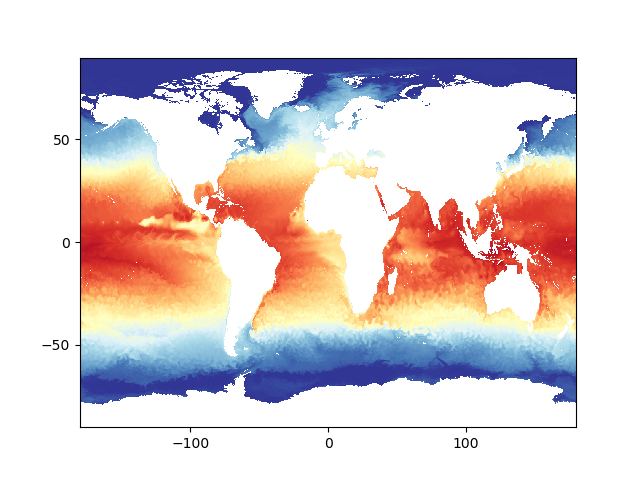

In [35]:
fig = plt.figure()
ax = plt.axes()

pyic.shade(lon[::10], lat[::10], t0i[::10,::10], ax=ax)
plt.savefig('test.png')

In [36]:
fpath_tgrid

'/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'

In [37]:
fpath_ckdtree

'/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'

In [38]:
%%time
lon_reg = [-68.5, -66.5]
lat_reg = [36.5, 37.5]
# lon_reg = [-66., -64.]
# lat_reg = [41, 42]
# clon_reg, clat_reg, vertex_of_cell_reg, edge_of_cell_reg, ind_reg = pyic.crop_tripolar_grid(lon_reg, lat_reg,
#                        clon, clat, vertex_of_cell, edge_of_cell)
lon, lat, toi = pyic.interp_to_rectgrid(t00, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)

CPU times: user 3.97 s, sys: 3.12 s, total: 7.09 s
Wall time: 7.09 s


<IPython.core.display.Javascript object>


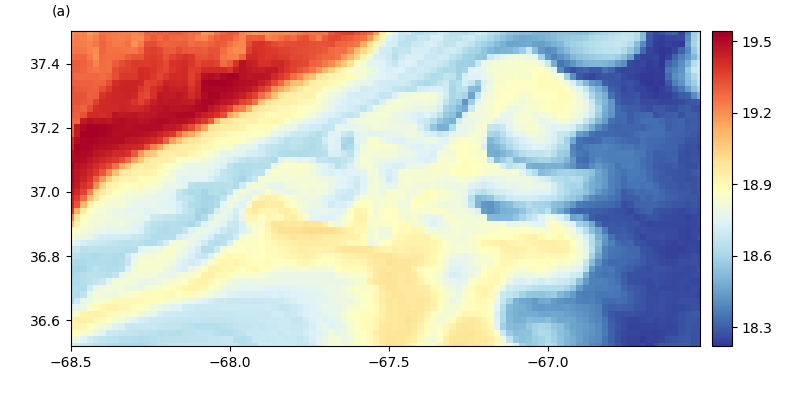

In [39]:
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=2.)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax)

# Plot Vorticity Field

In [40]:
search_str = f'{run}_vort_f_50m*.nc'
flist2 = np.array(glob.glob(path_data+search_str))
flist2.sort()
flist2

array(['/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_vort_f_50m_20100109T050000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_vort_f_50m_20100110T020000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_vort_f_50m_20100111T060000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_vort_f_50m_20100112T030000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_vort_f_50m_20100113T000000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_vort_f_50m_20100114T040000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_vort_f_50m_20100115T010000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_vort_f_50m_20100116T050000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas

In [41]:
%%time
# flist = f'{path_data}{run}_T_S_sp_*.nc'
flist2 = flist2[:10]
ds2 = xr.open_mfdataset(flist2, **mfdset_kwargs, chunks=dict(time=1, depth=1, depth_2=1))

CPU times: user 108 ms, sys: 239 ms, total: 347 ms
Wall time: 2.59 s


In [42]:
ds2

<xarray.Dataset>
Dimensions:           (ncells: 59799625, time: 34)
Coordinates:
  * time              (time) float64 2.01e+07 2.01e+07 ... 2.01e+07 2.01e+07
Dimensions without coordinates: ncells
Data variables:
    vort_f_cells_50m  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.2 (http://mpimet...
    Conventions:          CF-1.6
    number_of_grid_used:  42
    uuidOfHGrid:          0d39853e-c26b-11e9-8454-0b16a6d45f73
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-oes.git@e7e7a45736e586...
    history:              /work/mh0287/users/leonidas/icon/icon-oes_ngSMT/int...
    references:           see MPIM/DWD publications
    comment:              Leonidas Linardakis (m300056) on m20180 (Linux 2.6....

In [43]:
var2 = f'vort_f_cells_50m'
var2

'vort_f_cells_50m'

In [44]:
vort = ds2[var2]
vort

<xarray.DataArray 'vort_f_cells_50m' (time: 34, ncells: 59799625)>
dask.array<concatenate, shape=(34, 59799625), dtype=float32, chunksize=(1, 59799625), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 2.01e+07 2.01e+07 2.01e+07 ... 2.01e+07 2.01e+07
Dimensions without coordinates: ncells
Attributes:
    standard_name:                vort_f_cells_50m
    long_name:                    vorticity/coriolis on cells at 50m
    units:                        m/s
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [45]:
# add time coordinate
timesv, flist_tsv, itsv = pyic.get_timesteps(flist2, time_mode='float2date')
ds2['time'] = timesv

In [46]:
ds2

<xarray.Dataset>
Dimensions:           (ncells: 59799625, time: 34)
Coordinates:
  * time              (time) datetime64[ns] 2010-01-09T05:00:00 ... 2010-01-1...
Dimensions without coordinates: ncells
Data variables:
    vort_f_cells_50m  (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.2 (http://mpimet...
    Conventions:          CF-1.6
    number_of_grid_used:  42
    uuidOfHGrid:          0d39853e-c26b-11e9-8454-0b16a6d45f73
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-oes.git@e7e7a45736e586...
    history:              /work/mh0287/users/leonidas/icon/icon-oes_ngSMT/int...
    references:           see MPIM/DWD publications
    comment:              Leonidas Linardakis (m300056) on m20180 (Linux 2.6....

In [47]:
it = ((ds2.time - np.datetime64('2010-01-09')).astype(float)**2).argmin()
ds2.time[it]

<xarray.DataArray 'time' ()>
array('2010-01-09T05:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2010-01-09T05:00:00

In [48]:
vort0 = vort.isel(time=it)
vort0

<xarray.DataArray 'vort_f_cells_50m' (ncells: 59799625)>
dask.array<getitem, shape=(59799625,), dtype=float32, chunksize=(59799625,), chunktype=numpy.ndarray>
Coordinates:
    time     float64 2.01e+07
Dimensions without coordinates: ncells
Attributes:
    standard_name:                vort_f_cells_50m
    long_name:                    vorticity/coriolis on cells at 50m
    units:                        m/s
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [49]:
%%time
lon, lat, vort0i = pyic.interp_to_rectgrid(vort0, fpath_ckdtree)

CPU times: user 4.19 s, sys: 2.81 s, total: 7 s
Wall time: 7.11 s


<IPython.core.display.Javascript object>


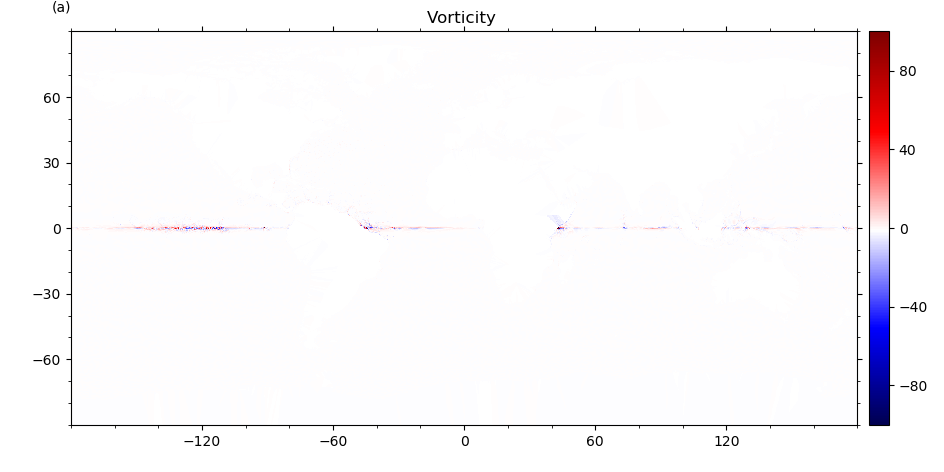

Text(0.5, 1.0, 'Vorticity ')

In [50]:
#fig = plt.figure()
#ax = plt.axes()
a=1
if abs(vort0i.min()) < abs(vort0i.max()) :
    vortm = abs(vort0i.min())
else :
    vortm = abs(vort0i.max())

hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=2.5)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon[::10], lat[::10], vort0i[::10,::10], ax=ax, cax=cax, cmap='seismic', clim=(-a*vortm,a*vortm))

pyic.plot_settings(ax, template='global', land_facecolor='none')
ax.set_title('Vorticity ')
#plt.savefig('test.png')

In [51]:
%%time
#lon_reg = [-68.5, -66.5]
#lat_reg = [36.5, 37.5]
lon_reg = [-66., -64.]
lat_reg = [41, 42]
lon_reg = [-70, -66]
lat_reg = [ 32, 36]
# clon_reg, clat_reg, vertex_of_cell_reg, edge_of_cell_reg, ind_reg = pyic.crop_tripolar_grid(lon_reg, lat_reg,
#                        clon, clat, vertex_of_cell, edge_of_cell)
lon, lat, vort0i2 = pyic.interp_to_rectgrid(vort0, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)

CPU times: user 4.14 s, sys: 3.07 s, total: 7.21 s
Wall time: 7.21 s


<IPython.core.display.Javascript object>


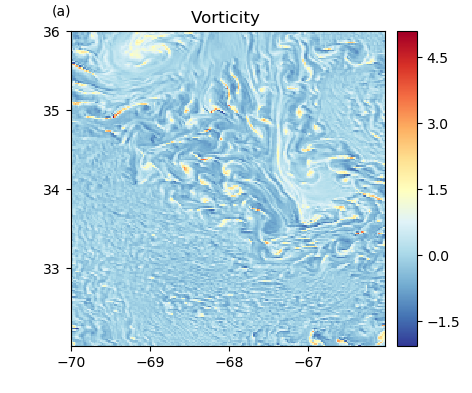

Text(0.5, 1.0, 'Vorticity ')

In [52]:
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, fig_size_fac=2.)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, vort0i2, ax=ax, cax=cax)

ax.set_title('Vorticity ')

In [53]:
vortm

99.98579

## Salinity Plot

In [54]:
## Choose salinity of certain depth 

depth0 = 40.
iz = np.argmin((depthc-depth0)**2)
iz

# Choose data variable
var = f'S{iz:03d}_sp'
var

s0 = ds[var]
s0

#timesv, flist_tsv, itsv = pyic.get_timesteps(flist, time_mode='float2date')
#ds['time'] = timesv

it = ((ds.time - np.datetime64('2010-01-09')).astype(float)**2).argmin()

#ds.time[it]

s00 = s0.isel(time=it)

In [55]:
var

'S012_sp'

<IPython.core.display.Javascript object>


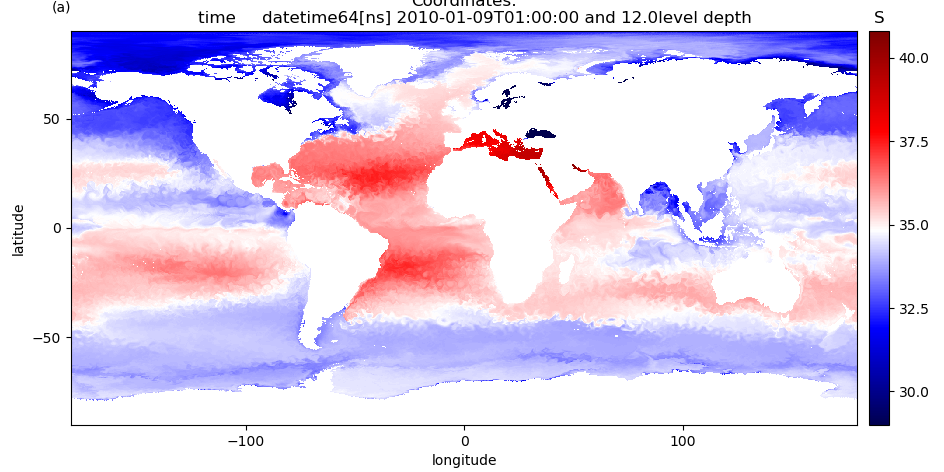

Text(0.5, 1.0, 'S')

In [63]:
lon, lat, s0i = pyic.interp_to_rectgrid(s00, fpath_ckdtree)


hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=2.5)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon[::10], lat[::10], s0i[::10,::10], ax=ax, cax=cax, cmap='seismic', clim=(29,s0i.max()))
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('salinity at %s and %.1flevel depth'%(ds.time[it], iz))
cax.set_title('S')


<IPython.core.display.Javascript object>


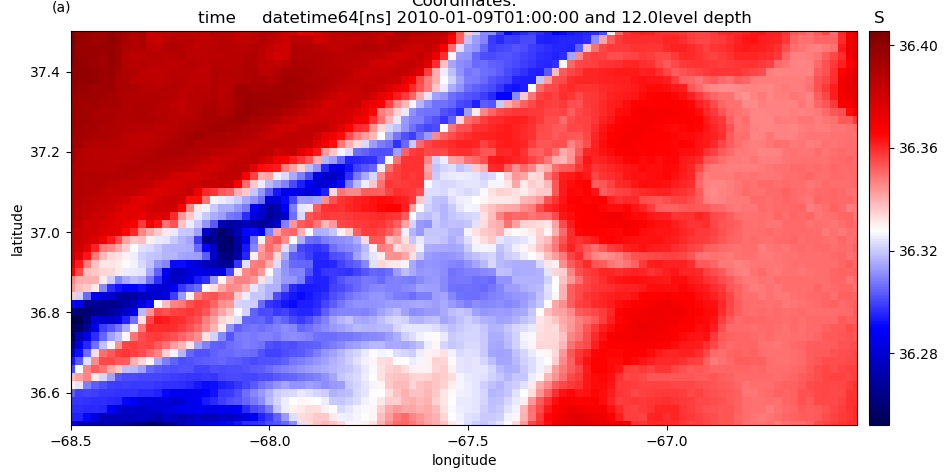

CPU times: user 4.48 s, sys: 3.36 s, total: 7.84 s
Wall time: 7.83 s


Text(0.5, 1.0, 'S')

In [65]:
%%time
lon_reg = [-68.5, -66.5]
lat_reg = [36.5, 37.5]
# lon_reg = [-66., -64.]
# lat_reg = [41, 42]
# clon_reg, clat_reg, vertex_of_cell_reg, edge_of_cell_reg, ind_reg = pyic.crop_tripolar_grid(lon_reg, lat_reg,
#                        clon, clat, vertex_of_cell, edge_of_cell)
lon, lat, soi = pyic.interp_to_rectgrid(s00, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)

# hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=2.)
# ii=-1

# ii+=1; ax=hca[ii]; cax=hca[ii]
# pyic.shade(lon, lat, soi, ax=ax, cax=cax)

hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=2.5)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, soi, ax=ax, cax=cax, cmap='seismic', clim=(soi.min(),soi.max()))
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('salinity at %s and %.1flevel depth'%(ds.time[it], iz))
cax.set_title('S')

## Look into further data

In [66]:
search_str = f'{run}_vn_sp_*.nc'
search_str = f'{run}_h_sp_*.nc'

flist3 = np.array(glob.glob(path_data+search_str))
flist3.sort()
flist3
#ngSMT_tke_vn_sp_097-112_20100130T010000Z.nc
#ngSMT_tke_h_sp_20100114T010000Z.nc

array(['/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_h_sp_20100109T010000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_h_sp_20100110T010000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_h_sp_20100111T010000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_h_sp_20100112T010000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_h_sp_20100113T010000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_h_sp_20100114T010000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_h_sp_20100115T010000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_h_sp_20100116T010000Z.nc',
       '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-01/ngSMT_tke_h_sp_20100

In [67]:
%%time
# flist = f'{path_data}{run}_T_S_sp_*.nc'
flist3 = flist3[:10]
ds3 = xr.open_mfdataset(flist3, **mfdset_kwargs, chunks=dict(time=1, depth=1, depth_2=1)) #what does happen here?

CPU times: user 72 ms, sys: 70 ms, total: 142 ms
Wall time: 84.3 ms


In [68]:
ds3

<xarray.Dataset>
Dimensions:  (ncells: 59799625, time: 120)
Coordinates:
  * time     (time) float64 2.01e+07 2.01e+07 2.01e+07 ... 2.01e+07 2.01e+07
Dimensions without coordinates: ncells
Data variables:
    h_sp     (time, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.2 (http://mpimet...
    Conventions:          CF-1.6
    number_of_grid_used:  42
    uuidOfHGrid:          0d39853e-c26b-11e9-8454-0b16a6d45f73
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-oes.git@e7e7a45736e586...
    history:              /work/mh0287/users/leonidas/icon/icon-oes_ngSMT/int...
    references:           see MPIM/DWD publications
    comment:              Leonidas Linardakis (m300056) on m20180 (Linux 2.6....

In [82]:
# Choose data variable
#var = f'vn{iz:03d}_sp'
var = f'h_sp'
var
vn0 = ds3[var]
vn0
#it = ((ds3.time - np.datetime64('2010-01-09')).astype(float)**2).argmin()
it=50
ds3.time[it]
vn00 = vn0.isel(time=it)

## Sea surface height

<IPython.core.display.Javascript object>


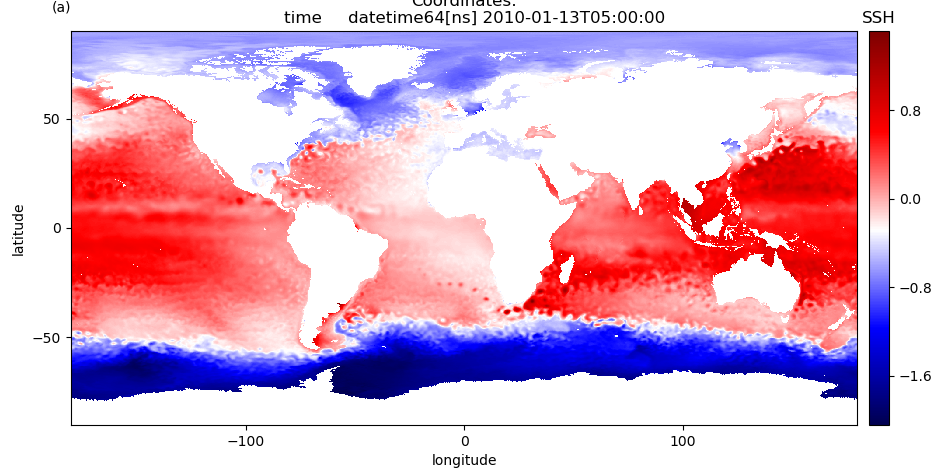

Text(0.5, 1.0, 'SSH')

In [83]:
#lon_reg = [-68.5, -60.5]
#lat_reg = [36.5, 40.5]

#lon, lat, vn0i = pyic.interp_to_rectgrid(vn00, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
lon, lat, vn0i = pyic.interp_to_rectgrid(vn00, fpath_ckdtree)

hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=2.5)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon[::10], lat[::10], vn0i[::10,::10], ax=ax, cax=cax, cmap='seismic', clim=(vn0i.min(),vn0i.max()))
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('SSH at %s'%(ds.time[it]))
cax.set_title('SSH')